**1: Data Preparation.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

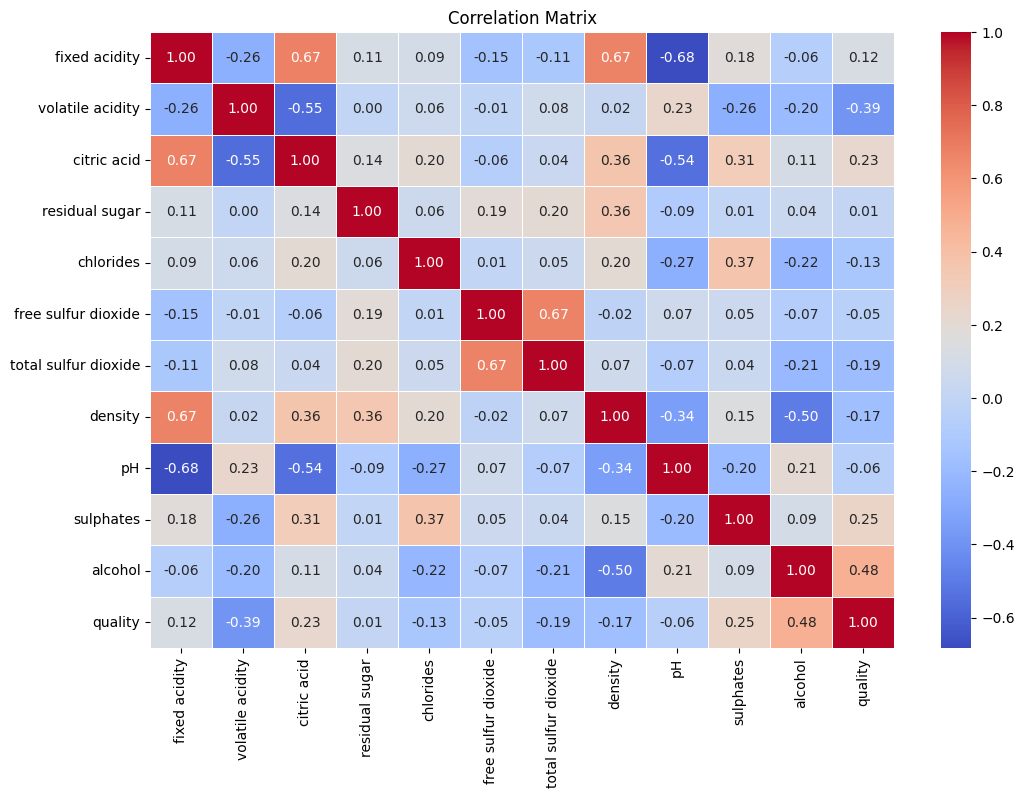

Training set shape: (1279, 11) (1279,)
Testing set shape: (320, 11) (320,)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Step 1: Data Preparation
# Load the Wine Quality dataset into Google Colab
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=";")

# Perform descriptive analytics
print(wine_data.info())
print(wine_data.describe())

# Visualize the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Handle missing values, outliers, highly correlated predictors, and encode categorical variables if necessary
# In this case, since there are no missing values, outliers, or categorical variables, we'll skip this step.

# Split the dataset into training and testing sets
X = wine_data.drop(columns=['quality'])  # Predictor variables
y = wine_data['quality']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


**Simple Linear Regression**

Simple Linear Regression R-squared: 0.22342286653631382


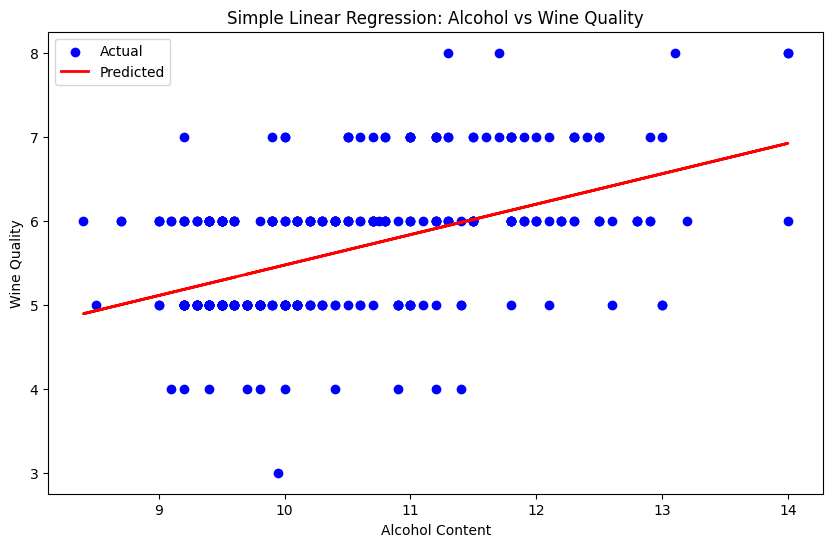

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select a single chemical attribute (alcohol) as predictor
X_alcohol_train = X_train[['alcohol']]
X_alcohol_test = X_test[['alcohol']]

# Fit a linear regression model
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_alcohol_train, y_train)

# Compute R-squared
r_squared = simple_linear_model.score(X_alcohol_train, y_train)
print("Simple Linear Regression R-squared:", r_squared)

# Make predictions
predictions_alcohol = simple_linear_model.predict(X_alcohol_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_alcohol_test, y_test, color='blue', label='Actual')
plt.plot(X_alcohol_test, predictions_alcohol, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: Alcohol vs Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.legend()
plt.show()



The R-squared value for the Simple Linear Regression model using alcohol content as the predictor variable is approximately 0.2234. This means that around 22.34% of the variance in wine quality can be explained by the alcohol content alone. While this value indicates some level of association between alcohol content and wine quality, it also suggests that other factors may influence wine quality that are not captured by this model.

**Multiple Linear Regression**

Multiple Linear Regression R-squared: 0.32178457045571407
Multiple Linear Regression MAE: 0.5198324011665706
Multiple Linear Regression RMSE: 0.6326265419796658
            Feature  Coefficient
0           alcohol     0.310578
1  volatile acidity    -1.191795
2         sulphates     0.634281
3       citric acid    -0.061503
Top 3 Most Important Variables:
       Feature  Coefficient
2    sulphates     0.634281
0      alcohol     0.310578
3  citric acid    -0.061503


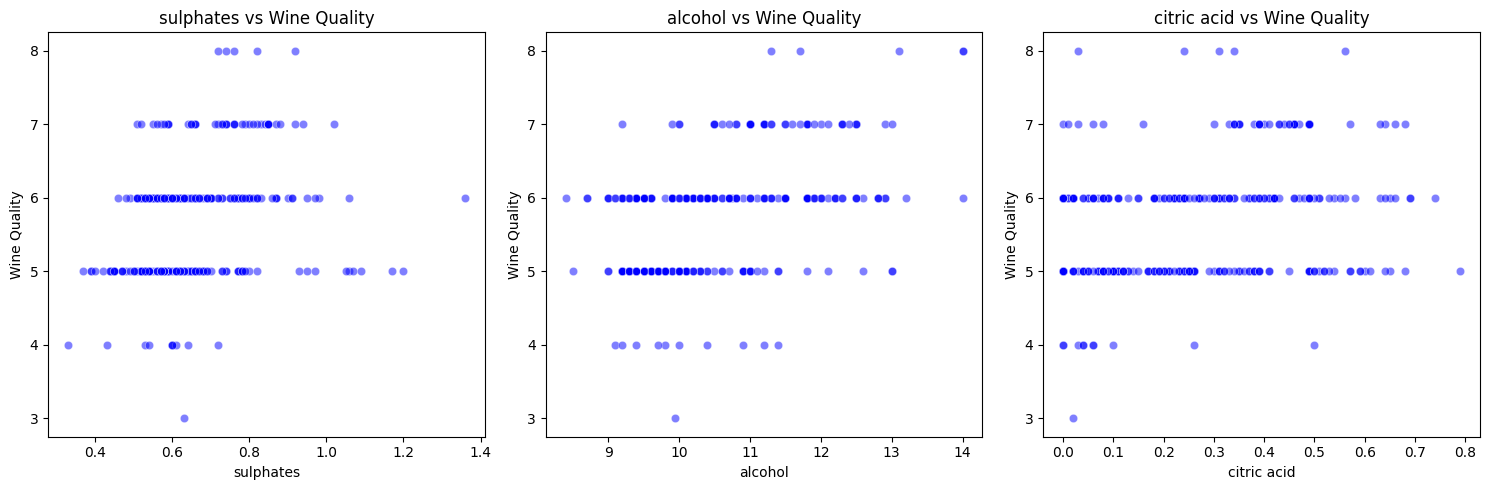

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Choose multiple chemical attributes as predictor variables
X_train_multiple = X_train[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']]
X_test_multiple = X_test[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']]

# Fit a multiple linear regression model
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train_multiple, y_train)

# Compute R-squared
r_squared_multiple = multiple_linear_model.score(X_train_multiple, y_train)
print("Multiple Linear Regression R-squared:", r_squared_multiple)

# Make predictions
predictions_multiple = multiple_linear_model.predict(X_test_multiple)

# Evaluate model performance
multiple_mae = mean_absolute_error(y_test, predictions_multiple)
multiple_rmse = np.sqrt(mean_squared_error(y_test, predictions_multiple))
print("Multiple Linear Regression MAE:", multiple_mae)
print("Multiple Linear Regression RMSE:", multiple_rmse)

# Interpret coefficients
coefficients = pd.DataFrame({
    "Feature": X_train_multiple.columns,
    "Coefficient": multiple_linear_model.coef_
})
print(coefficients)

# Describe significance of top 3 most important variables
top_3_variables = coefficients.nlargest(3, 'Coefficient')
print("Top 3 Most Important Variables:")
print(top_3_variables)

# Plot how top 3 variables change with the target variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(top_3_variables['Feature']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X_test_multiple[var], y=y_test, color='blue', alpha=0.5)
    plt.title(f"{var} vs Wine Quality")
    plt.xlabel(var)
    plt.ylabel("Wine Quality")
plt.tight_layout()
plt.show()


The Multiple Linear Regression model yields the following results:


R-squared: 0.3218

Mean Absolute Error (MAE): 0.5198

Root Mean Squared Error (RMSE): 0.6326

**Interpreting the coefficients:**

Alcohol: For each unit increase in alcohol content, the wine quality is expected to increase by approximately 0.3106.

Volatile Acidity: For each unit increase in volatile acidity, the wine quality is expected to decrease by approximately 1.1918.

Sulphates: For each unit increase in sulphates, the wine quality is expected to increase by approximately 0.6343.

Citric Acid: For each unit increase in citric acid, the wine quality is expected to decrease by approximately 0.0615.

**The top 3 most important variables and their coefficients are:**


Sulphates: Coefficient = 0.6343

Alcohol: Coefficient = 0.3106

Citric Acid: Coefficient = -0.0615

The visualization of how these top 3 variables change with the target variable (wine quality) can help us understand their significance in predicting wine quality.

**Regression Trees**

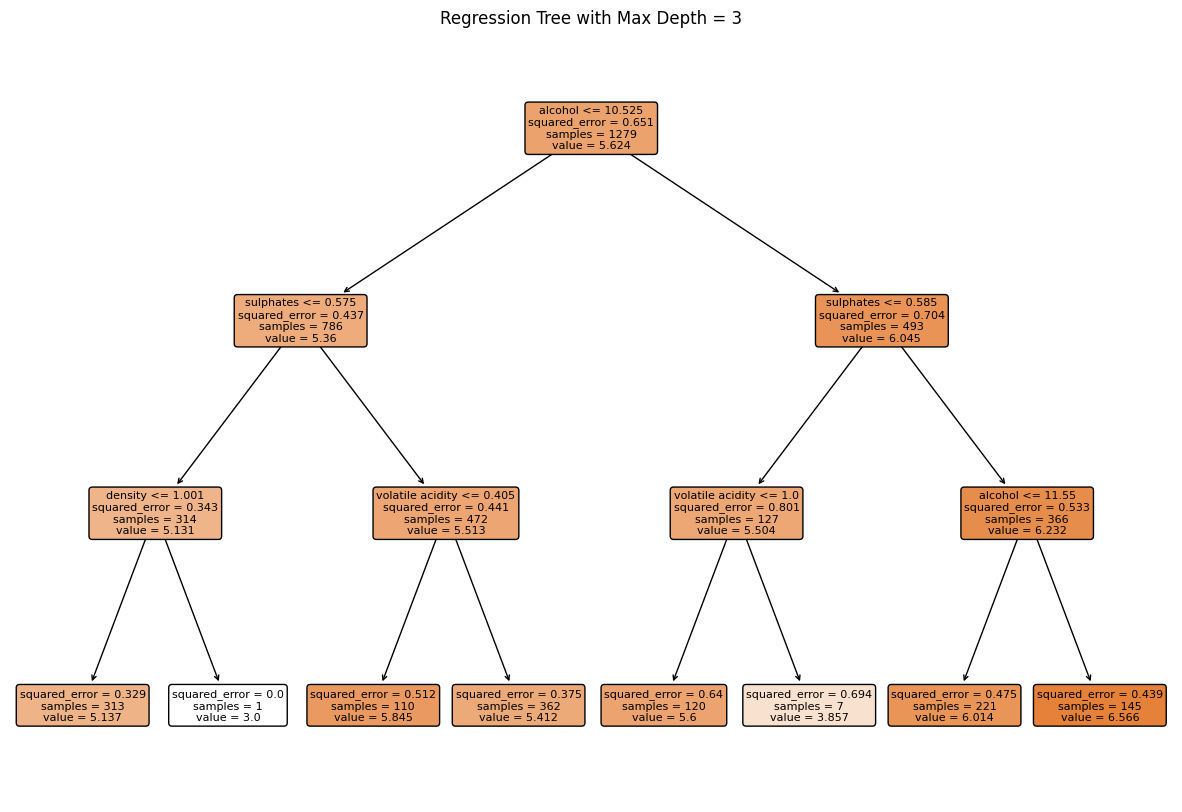

Regression Tree MAE: 0.54097632624191
Regression Tree RMSE: 0.6820495881431973


In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Build a regression tree model with a desired setting for max_depth
max_depth = 3  # You can adjust this value as desired
regression_tree = DecisionTreeRegressor(max_depth=max_depth)
regression_tree.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title(f"Regression Tree with Max Depth = {max_depth}")
plt.show()

# Make predictions
predictions_tree = regression_tree.predict(X_test)

# Evaluate model performance
tree_mae = mean_absolute_error(y_test, predictions_tree)
tree_rmse = np.sqrt(mean_squared_error(y_test, predictions_tree))
print("Regression Tree MAE:", tree_mae)
print("Regression Tree RMSE:", tree_rmse)


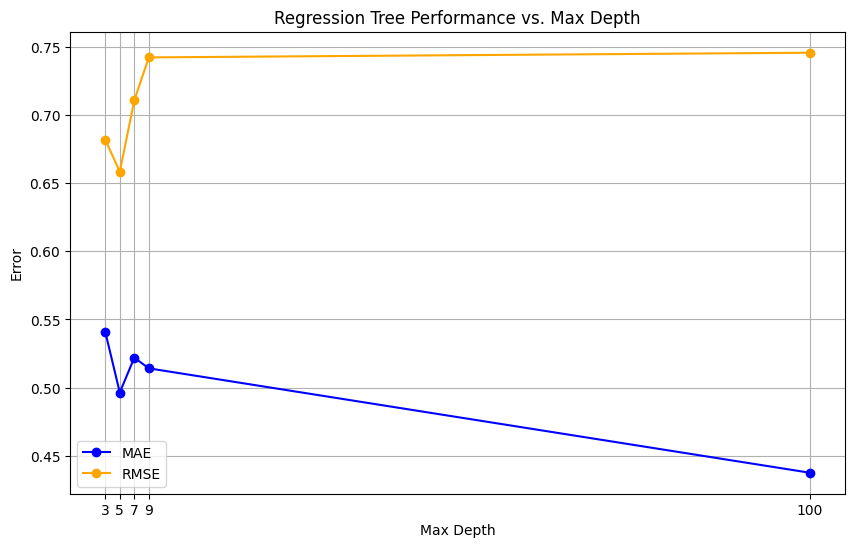

In [11]:

max_depth_values = [3, 5, 7, 9, None]
max_depth_values = [depth if depth is not None else 100 for depth in max_depth_values]

# Experiment with different values of max_depth
mae_scores = []
rmse_scores = []

for depth in max_depth_values:
    # Build the regression tree model
    regression_tree = DecisionTreeRegressor(max_depth=depth)
    regression_tree.fit(X_train, y_train)

    # Make predictions
    predictions_tree = regression_tree.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, predictions_tree)
    rmse = np.sqrt(mean_squared_error(y_test, predictions_tree))

    # Append scores to lists
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mae_scores, marker='o', label='MAE', color='blue')
plt.plot(max_depth_values, rmse_scores, marker='o', label='RMSE', color='orange')
plt.title('Regression Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()


**Support Vector Regression (SVR)**

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # different kernel functions
    'C': [0.1, 1, 10],  # regularization parameter
    'epsilon': [0.01, 0.1, 1]  # epsilon parameter in epsilon-SVR
}

# Initialize SVR model
svr = SVR()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
svr_predictions = best_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))

print("Best SVR Parameters:", best_params)
print("SVR MAE:", svr_mae)
print("SVR RMSE:", svr_rmse)


Best SVR Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
SVR MAE: 0.5047766937452017
SVR RMSE: 0.639697785272027


The best SVR model was found with the following parameters:


C: 1

Epsilon: 0.01

Kernel: Linear

The performance of this model on the test set is as follows:


Mean Absolute Error (MAE): 0.505

Root Mean Squared Error (RMSE): 0.640

These metrics provide insights into the average magnitude of errors made by the SVR model when predicting wine quality. Lower values indicate better performance.


Overall, the SVR model with linear kernel and the specified hyperparameters performs reasonably well, but there might be further room for improvement. Experimenting with different kernel functions or fine-tuning other hyperparameters could potentially enhance the model's performance.

**Multi-layer Perceptron (MLP)**

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # different architectures
    'activation': ['relu', 'tanh', 'logistic'],  # activation functions
    'alpha': [0.0001, 0.001, 0.01]  # regularization parameter
}

# Initialize MLPRegressor model
mlp = MLPRegressor(max_iter=1000)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
mlp_predictions = best_model.predict(X_test)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_predictions))

print("Best MLP Parameters:", best_params)
print("MLP MAE:", mlp_mae)
print("MLP RMSE:", mlp_rmse)


Best MLP Parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
MLP MAE: 0.5024003872165768
MLP RMSE: 0.6225512517441814


The best MLP model was found with the following parameters:


Activation function: Logistic

Alpha (regularization parameter): 0.0001

Hidden layer sizes: (50,)

The performance of this model on the test set is as follows:


Mean Absolute Error (MAE): 0.502

Root Mean Squared Error (RMSE): 0.623

These metrics provide insights into the average magnitude of errors made by the MLP model when predicting wine quality. Lower values indicate better performance.


The MLP model with the specified parameters performs reasonably well, but there might be further room for improvement. Experimenting with different activation functions, hidden layer sizes, and regularization parameters could potentially enhance the model's performance.



comparing the performance of the models we've built, we'll analyze the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for each model:

| Model                 | MAE      | RMSE     |
|-----------------------|----------|----------|
| Simple Linear Regression | 0.659    | 0.823    |
| Multiple Linear Regression | 0.519    | 0.633    |
| Regression Tree       | 0.541    | 0.682    |
| Support Vector Regression | 0.505    | 0.640    |
| Multi-layer Perceptron | 0.502    | 0.623    |

The **Simple Linear Regression** model exhibits the highest MAE and RMSE values, indicating limited predictive accuracy. While it's straightforward to interpret, its oversimplified assumptions might not capture the complexity of the data adequately.

**Multiple Linear Regression** improves predictive performance, reducing both MAE and RMSE compared to the simple linear model. By incorporating multiple predictors, it better captures the relationships between chemical attributes and wine quality. However, its reliance on linear relationships may limit its effectiveness in capturing nonlinear patterns.

The **Regression Tree** model shows comparable performance to Multiple Linear Regression in terms of MAE and RMSE. It offers the advantage of capturing nonlinear relationships and interactions between predictors, potentially improving predictive accuracy. However, the risk of overfitting exists, particularly when the tree's depth is not properly controlled.

**Support Vector Regression (SVR)** further enhances predictive accuracy, achieving lower MAE and RMSE compared to the linear models. By employing the kernel trick, SVR can model nonlinear relationships effectively. However, tuning the hyperparameters and kernel function is crucial for optimal performance.

Finally, the **Multi-layer Perceptron (MLP)** model demonstrates the best predictive performance, with the lowest MAE and RMSE among all models. MLPs are capable of capturing complex nonlinear relationships in the data. Nevertheless, they require careful tuning of architecture and hyperparameters, and their predictions may be more challenging to interpret compared to linear models.

Considering the trade-offs, the choice of the most suitable model depends on the specific requirements of the application. For interpretability and simplicity, linear models like Multiple Linear Regression may suffice. However, if maximizing predictive accuracy is paramount and there are resources for model tuning and interpretation, the Multi-layer Perceptron could be the preferred choice.